# CODE (Lecture 6) - 23 November / 2021 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
from sympy import Matrix
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'



### Integrators

In [2]:
def rk4s(f,h,x,**kwargs): # RK4 single iteration
    k1 = h*f(x,**kwargs)
    k2 = h*f(x+0.5*k1,**kwargs)
    k3 = h*f(x+0.5*k2,**kwargs)
    k4 = h*f(x+k3,**kwargs)
    x += (k1+2*k2+2*k3+k4)/6
    return x 

def rk4(f,y0,t,**kwargs): # # RK4 timeline
    n = len(t)
    m = len(y0)
    y = np.zeros((n,m))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(y[i], t[i], **kwargs)
        k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h, **kwargs)
        k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h, **kwargs)
        k4 = h * f(y[i] + k3, t[i+1], **kwargs)
        y[i+1] = y[i] + (k1 + 2.0 * ( k2 + k3 ) + k4)/6.0
    return y

### Plotter 2D

In [37]:
def plotSpace2D(ax, f, lims=(-1,1,-1,1), kx=11, ky=11, steps=1, h=0.05, bound=1e4,
                arrows=0, arrW=0.2, lw=1, alpha=1, showinits=True, report=True, **kwargs):
    if report: print('Plotting', kx*ky*steps, 'segments')
    points = []
    for x in np.linspace(lims[0],lims[1],num=kx, endpoint=True):
        for y in np.linspace(lims[2],lims[3],num=ky, endpoint=True):
            points.append((x,y))      
    plt.xlim(lims[0],lims[1]) 
    plt.ylim(lims[2],lims[3])
    for (x,y) in points:
        X1 = [x,y]
        if showinits: ax.plot(x,y, marker ='.', c='k', alpha=0.2)
        for it in range(steps):
            X2 = rk4s(f,h,X1,**kwargs)
            if any(X2>bound) or any(X2<-bound): break
            if arrows and not it%arrows and it:
                ax.arrow(X1[0],X1[1], X2[0]-X1[0], X2[1]-X1[1], fc='k',
                          width=0, length_includes_head=True, head_width=arrW*arrows)
            else: ax.plot([X1[0],X2[0]],[X1[1],X2[1]], 'k', lw=lw, alpha=alpha)
            X1[:] = X2[:]

### Matrix

In [3]:
def info(X):
    print(X)
    EIG = np.linalg.eig(X)
    print('Eigen Values :',EIG[0])
    for eigvec in EIG[1]: print('Eigen Vector :',eigvec)
    print('Det :', np.linalg.det(X),'| Trace :', np.trace(X))

### Synchronization of coupled linear systems


In [50]:
def coupled_linear_systems(X, t=0, a=1, alph=0):
    dx = np.zeros_like(X)
    dx[0] = a*X[0] + alph*(X[1]-X[0])
    dx[1] = a*X[1] + alph*(X[0]-X[1])
    return dx

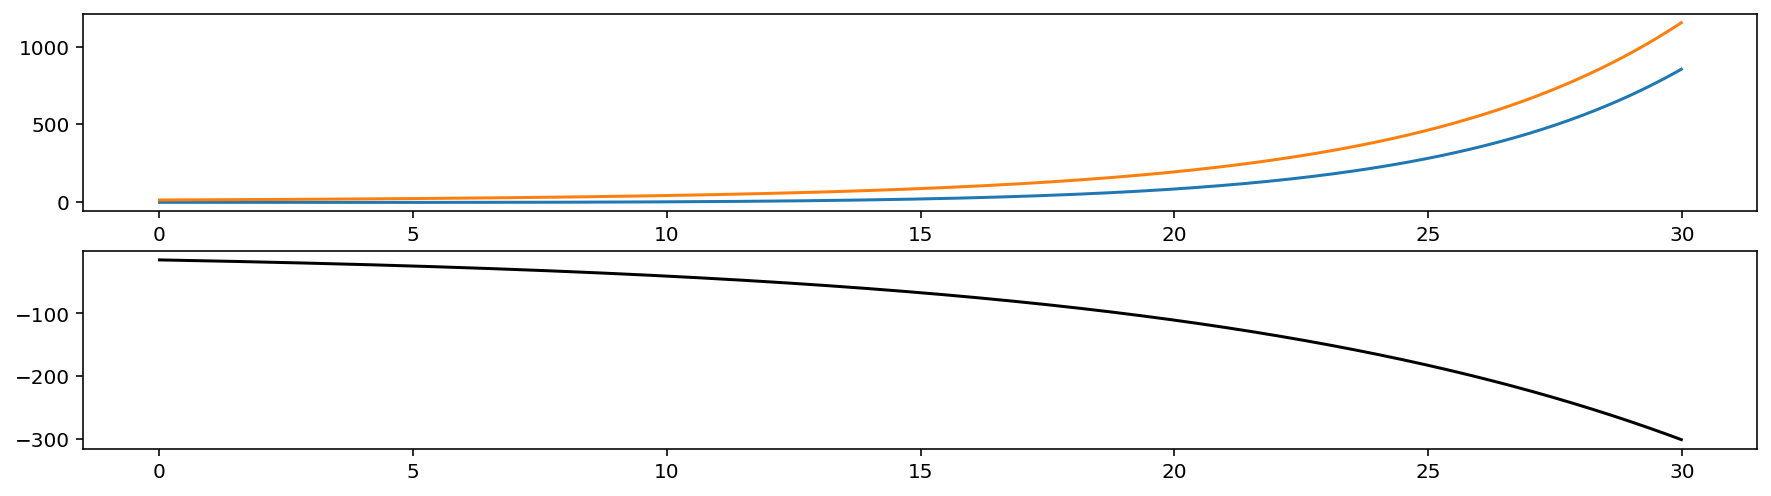

In [52]:
x0 = [-5,10]
t_init, t_final = 0, 30
h = 0.01
t = np.arange(t_init,t_final,h)

a = 0.2
alpha = 0.05

X = rk4(coupled_linear_systems, x0, t, a=a, alph=alpha)
z = X[:,0]-X[:,1]
plt.figure(figsize=(15,4))
plt.subplot(211)
plt.plot(t, X, '-')
plt.subplot(212)
plt.plot(t, z, '-k')
plt.show()

Plotting 1440 segments
Plotting 1440 segments
Plotting 1440 segments
Plotting 1440 segments


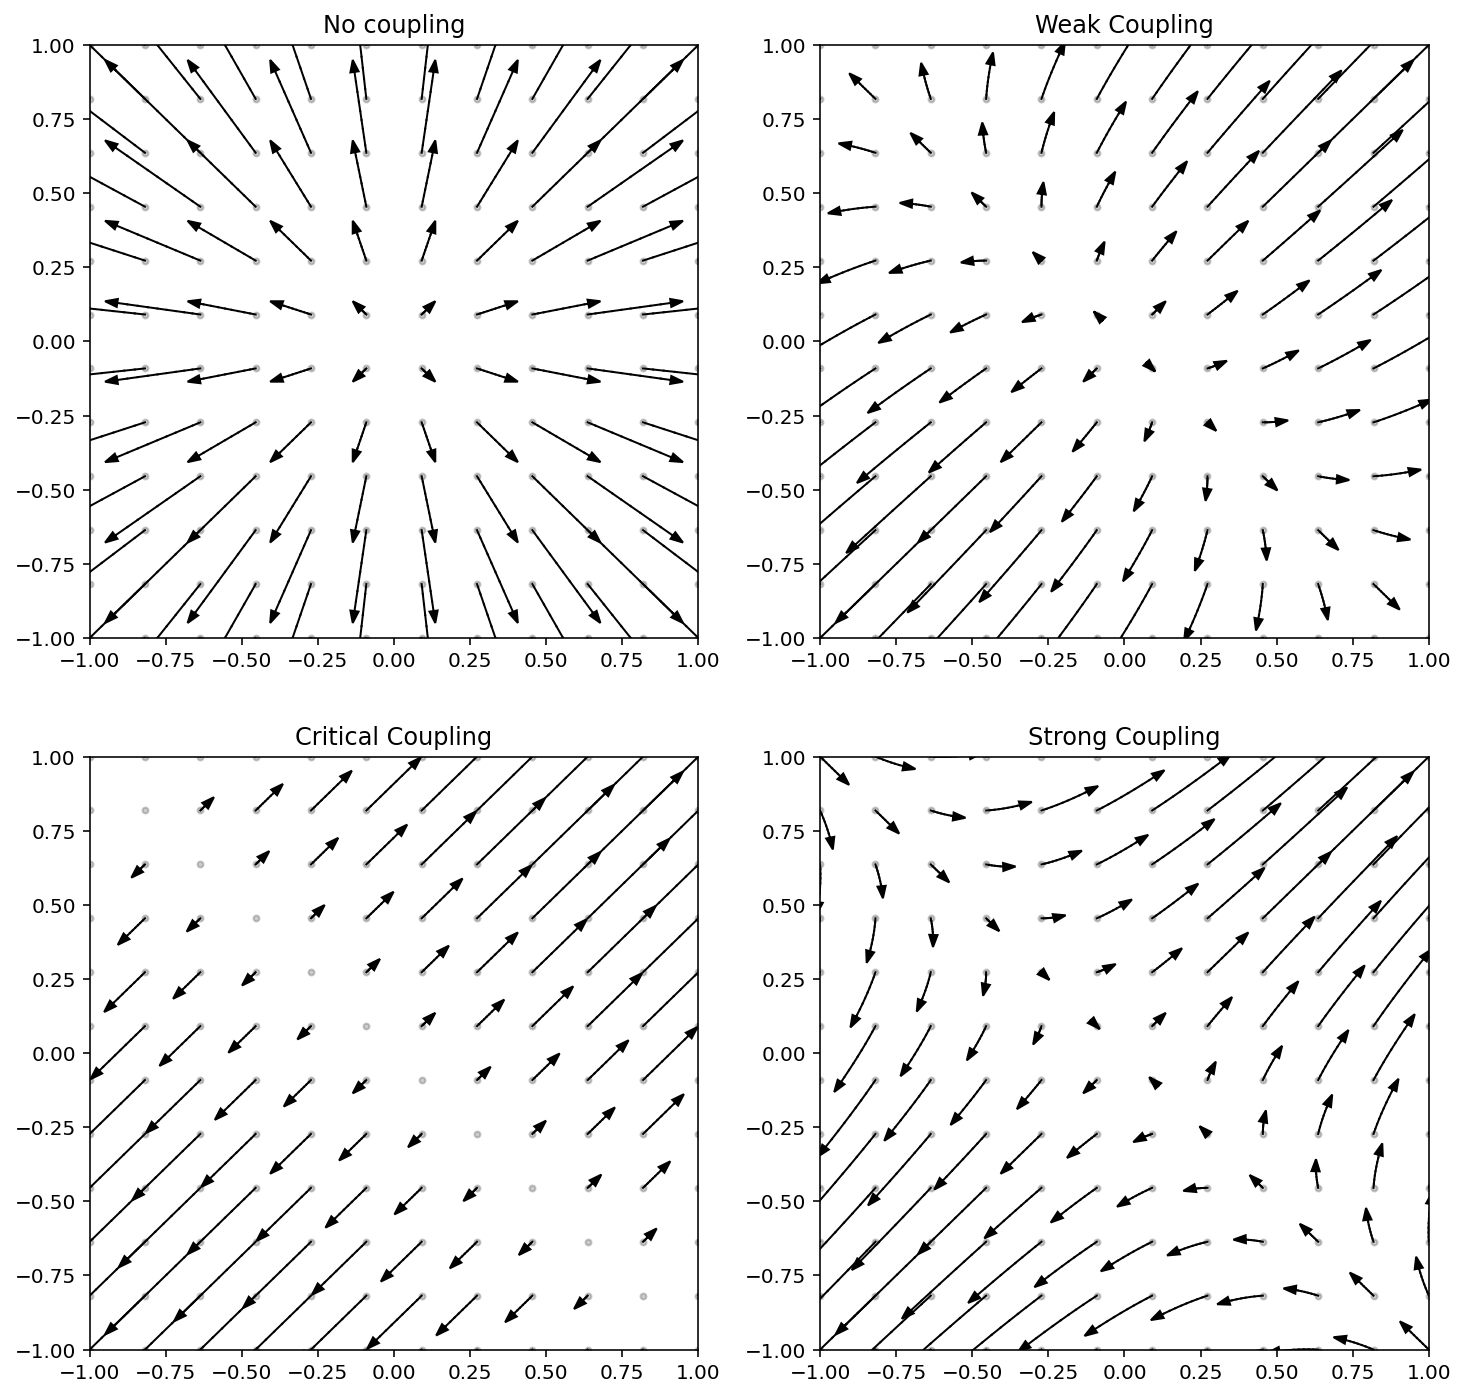

In [75]:
plt.figure(figsize=(12,12))
plotSpace2D(plt.subplot(221, title='No coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.00, 
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plotSpace2D(plt.subplot(222, title='Weak Coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.15,
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plotSpace2D(plt.subplot(223, title='Critical Coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.20,
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plotSpace2D(plt.subplot(224, title='Strong Coupling'),coupled_linear_systems, h=0.1, a=0.4, alph=0.25,
            kx=12, ky=12, steps=10, arrows=9, arrW=0.003)
plt.show()